In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h2>Read Data File

In [19]:
data = pd.read_csv('../data/data.csv')
display(data.head())

,Student ID,Name,Gender,Parental Support,Previous Grade,Study Hours Per Week,Extracurricular Activities,Attendance Rate,Final Grade
0,0,Ashley Griffin,Male,Medium,77.483571,24.996777,5,53.248217,74.924988
1,1,Janet Singh,Male,High,84.308678,29.623168,2,74.554813,99.000000
2,2,Richard Bernard,Female,Medium,78.238443,18.298152,5,52.075801,74.307872
3,3,Vanessa Meyer,Male,Medium,82.615149,14.765316,1,64.920385,89.178993
4,4,Rodney Holmes,Male,Low,48.829233,15.491117,4,50.000000,58.903799


<h2>Convert String to numeric data

In [20]:
length = len(data)
Parental_Support = np.array([
    0 if data['Parental Support'][i] == 'Low' 
    else 1 if data['Parental Support'][i] == 'Medium'
    else 2
    for i in range(length)
])

<h2>Add the new data 

In [21]:
data['Parental Support Numeric'] = Parental_Support
print(data.head())

   Student ID             Name  Gender Parental Support  Previous Grade  \
0           0   Ashley Griffin    Male           Medium       77.483571   
1           1      Janet Singh    Male             High       84.308678   
2           2  Richard Bernard  Female           Medium       78.238443   
3           3    Vanessa Meyer    Male           Medium       82.615149   
4           4    Rodney Holmes    Male              Low       48.829233   

   Study Hours Per Week  Extracurricular Activities  Attendance Rate  \
0             24.996777                           5        53.248217   
1             29.623168                           2        74.554813   
2             18.298152                           5        52.075801   
3             14.765316                           1        64.920385   
4             15.491117                           4        50.000000   

   Final Grade  Parental Support Numeric  
0    74.924988                         1  
1    99.000000                

<h2>Allocating Features and target

In [22]:

features = np.array(
    [
    'Parental Support Numeric',
    'Previous Grade',
    'Study Hours Per Week',
    'Extracurricular Activities',
    'Attendance Rate',
]
)
target = np.array(['Final Grade'])

<h2>Read Features and Target Data

In [23]:
x = data[features]
print(x.head())

y = data[target]
print(y.head())

   Parental Support Numeric  Previous Grade  Study Hours Per Week  \
0                         1       77.483571             24.996777   
1                         2       84.308678             29.623168   
2                         1       78.238443             18.298152   
3                         1       82.615149             14.765316   
4                         0       48.829233             15.491117   

   Extracurricular Activities  Attendance Rate  
0                           5        53.248217  
1                           2        74.554813  
2                           5        52.075801  
3                           1        64.920385  
4                           4        50.000000  
   Final Grade
0    74.924988
1    99.000000
2    74.307872
3    89.178993
4    58.903799


<h2>Splitting Data for Test and Train

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state= None) #random_state = None gives Random data split everytime executed

In [25]:
print(x_train.head())
print(y_train.head())

     Parental Support Numeric  Previous Grade  Study Hours Per Week  \
946                         0       42.372374             13.885502   
57                          1       73.453938             23.863645   
238                         1       71.691068             20.844915   
993                         1       71.590079             21.541519   
112                         1       75.301151             22.350339   

     Extracurricular Activities  Attendance Rate  
946                           0        55.852094  
57                            0        78.743892  
238                           3        59.929637  
993                           3        61.877910  
112                           2        66.409192  
     Final Grade
946    58.055330
57     92.663062
238    81.092769
993    85.304725
112    84.359326


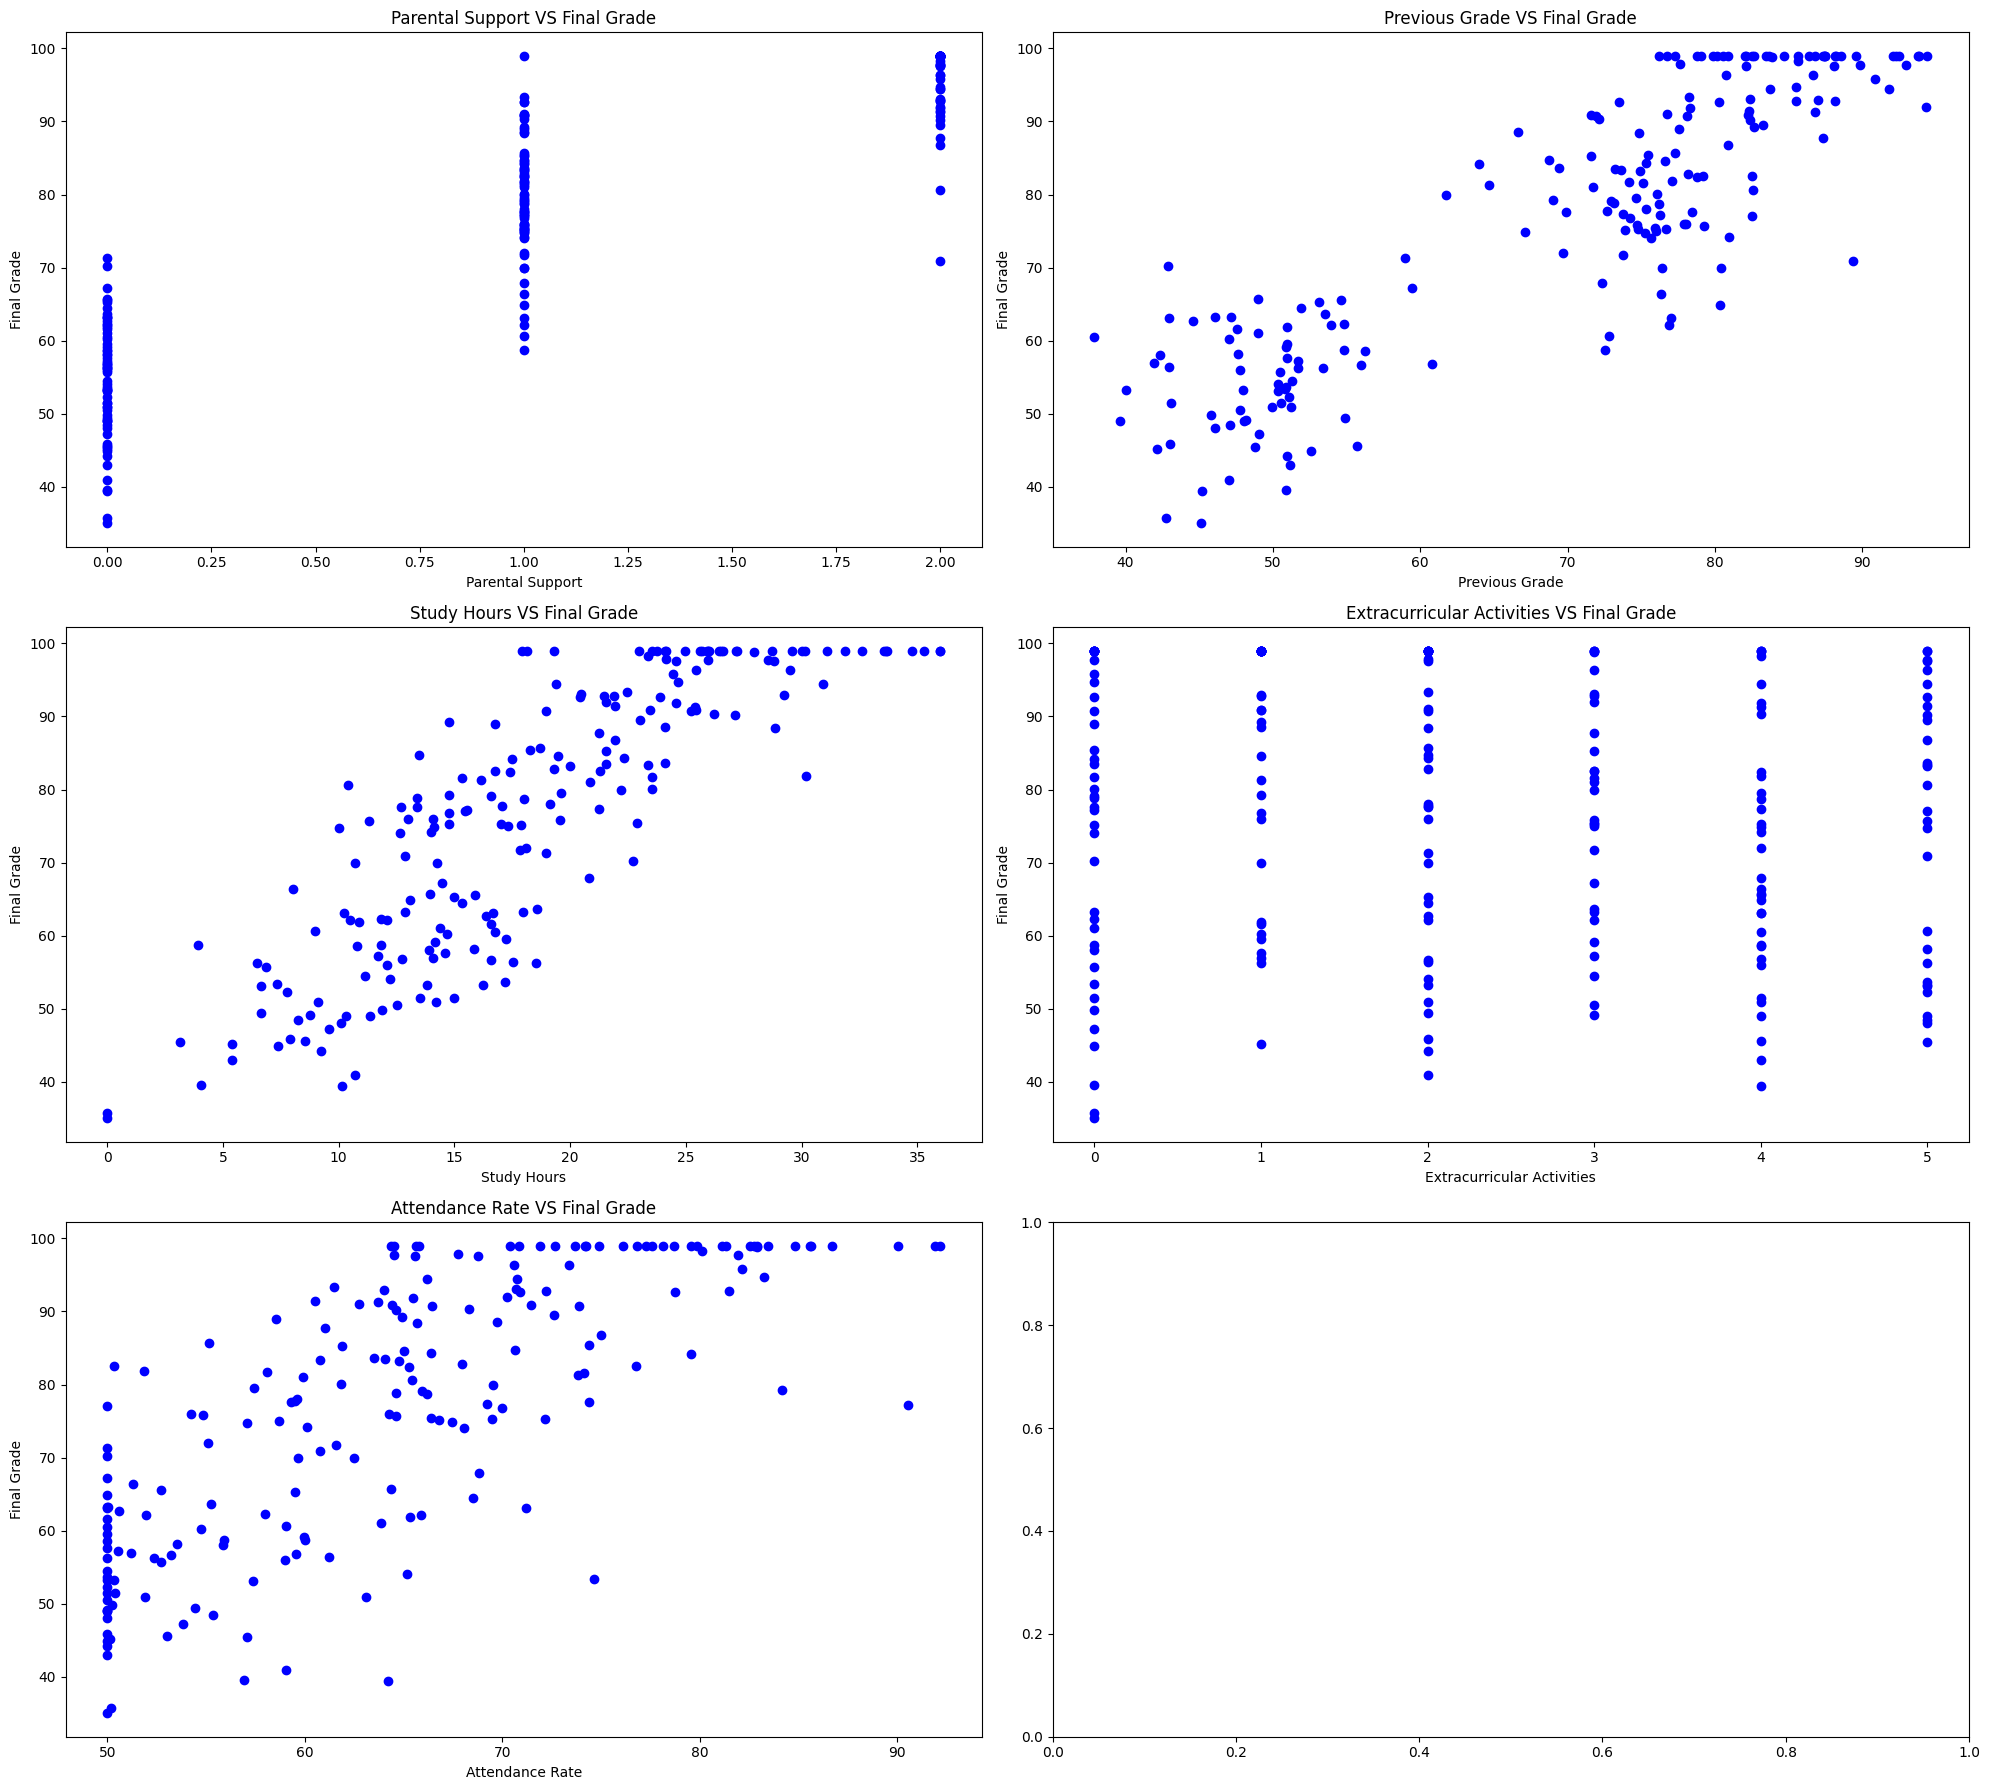

In [26]:
# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(3, 2, figsize=(20, 18))  # 1 row, 2 columns, width=12, height=5

ax[0, 0].scatter(x_train['Parental Support Numeric'],y_train, color = 'blue')
ax[0, 0].set_title('Parental Support VS Final Grade')
ax[0, 0].set_xlabel('Parental Support')
ax[0, 0].set_ylabel('Final Grade')

ax[0, 1].scatter(x_train['Previous Grade'],y_train, color = 'blue')
ax[0, 1].set_title('Previous Grade VS Final Grade')
ax[0, 1].set_xlabel('Previous Grade')
ax[0, 1].set_ylabel('Final Grade')

ax[1, 0].scatter(x_train['Study Hours Per Week'],y_train, color = 'blue')
ax[1, 0].set_title('Study Hours VS Final Grade')
ax[1, 0].set_xlabel('Study Hours')
ax[1, 0].set_ylabel('Final Grade')

ax[1, 1].scatter(x_train['Extracurricular Activities'],y_train, color = 'blue')
ax[1, 1].set_title('Extracurricular Activities VS Final Grade')
ax[1, 1].set_xlabel('Extracurricular Activities')
ax[1, 1].set_ylabel('Final Grade')

ax[2, 0].scatter(x_train['Attendance Rate'],y_train, color = 'blue')
ax[2, 0].set_title('Attendance Rate VS Final Grade')
ax[2, 0].set_xlabel('Attendance Rate')
ax[2, 0].set_ylabel('Final Grade')

plt.tight_layout()  # Adjust spacing to fit both plots nicely
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
score = model.score(x_test,y_test)

In [30]:
print(f'mean square error: {mse}')
print(f'r2 score: {r2}')
print(f'score: {score}')

mean square error: 26.76074019684899
r2 score: 0.9221621654038158
score: 0.9221621654038158


<h2>Please Donot Run this section</h2>
<h4>change the file name if you need to run this</h4>
<p>Original file name is model.pkl<p>

In [31]:
import pickle
with open('../data/model45.pkl','wb') as f:
    pickle.dump(model,f)

In [32]:
with open ('../data/model45.pkl','rb') as f:
    load = pickle.load(f)

y_load = load.predict(x_test)
print(f'The mean squared error is: {mean_squared_error(y_test, y_load)}')
print(f'The R2 score is: {r2_score(y_test,y_load)}')
print(f'The score is: {load.score(x_test, y_test)}')

The mean squared error is: 26.76074019684899
The R2 score is: 0.9221621654038158
The score is: 0.9221621654038158
